# Coeus AI
## Jupyter Notebook para realizar el pre-procesamiento de las imágenes.
### Imports

In [1]:
import os
import cv2
import json
import random
import numpy as np
import pandas as pd
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image


from extras.preprocessing import *

### Se crea una clase Documento

In [2]:
class Documento:
    """
    Clase que contiene todos los datos necesarios para describir y analizar un Documento.
    """
    def __init__(self, nombre_archivo, conjunto, texto_manual):
        # Datos proporcionados originalmente
        self.nombre_archivo = nombre_archivo
        self.conjunto = conjunto
        self.texto_manual = texto_manual
        
        # Datos obtenidos automáticamente
        self.texto_ocr_default = None
        self.texto_ocr_mejorado = None
        
        # PLN
        self.personas = []
        self.organizaciones = []
        self.lugares = []
        self.fechas = []
        
    def get_ruta_archivo(self):
        return os.path.join(self.conjunto, self.nombre_archivo)
    
    def set_texto_ocr_default(self, texto):
        self.texto_ocr_default = texto

    def set_texto_ocr_mejorado(self, texto):
        self.texto_ocr_mejorado = texto
    
    def add_persona(self, person):
        self.personas.append(person)
    
    def add_organizacion(self, organizacion):
        self.organizaciones.append(organizacion)
                            
    def add_lugar(self, lugar):
        self.lugares.append(lugar)
    
    def add_fecha(self, fecha):
        self.fechas.append(fecha)

### Creando un sub-conjunto aleatorio de pruebas

In [3]:
def generate_dataset(path_to_transcripions):
    """
    Función que genera un diccionario de objetos Documento para cada uno
    de los elementos presentes en el archivo de transcripciones proporcionado.
    """
    # Se carga el archivo de transcripciones
    df = pd.read_csv(path_to_transcripions)
    
    # Se crea un diccionario para los documentos
    documentos = {}
    
    # Por cada archivo dentro del archivo de transcripciones
    for index in df.index:
        # Obteniendo el nombre del archivo
        filename = str(df['NombreArchivo'][index])
        
        # Se crea un documento temporal, que será añadido al diccionario
        temporal_doc = Documento(filename, 
                                 df['Conjunto'][index], 
                                 df['Texto'][index])

        # Agregando el documento al diccionario
        documentos[filename] = temporal_doc

    return documentos

def generate_random_test(dataset, N, conjunto, seed):
    """
    Función que genera un subconjunto aleatorio de N elementos a partir de un determinado 
    conjunto de 'dataset'.
    dataset es un diccionario de Documentos, se puede generar con generate_dataset.
    """
    # Se filtran los elementos segun 'conjunto'
    filtered_dict = dict(filter(lambda elem: elem[1].conjunto == conjunto, dataset.items()))
    
    # Se retornan N elementos aleatorios
    random.seed(seed)
    return dict(random.sample(filtered_dict.items(), N))

def datos_head(dataset, N):
    """
    Función que imprime N elementos (Documento) de un dataset. Para fines de 
    visualización.
    """
    for item in list(dataset.items())[:N]:
        print("Nombre del archivo:", item[1].nombre_archivo)
        print("Conjunto del archivo:", item[1].conjunto)
        print("Ruta:",item[1].get_ruta_archivo())
        print('-------------------------------------------------------------------')
    
dataset = generate_dataset("Datos/JusticIA_DatosTranscripciones.csv")
test_set = generate_random_test(dataset, 100, 'Fichas_manual', seed=1)
datos_head(test_set, 5)

Nombre del archivo: Ficheros_Detenidos_Desaparecidos_Cabanas_Fierro_Zacarias_76-12-07,_CABANAS_FIERRO_ZACARIAS-3-.JPG
Conjunto del archivo: Fichas_manual
Ruta: Fichas_manual/Ficheros_Detenidos_Desaparecidos_Cabanas_Fierro_Zacarias_76-12-07,_CABANAS_FIERRO_ZACARIAS-3-.JPG
-------------------------------------------------------------------
Nombre del archivo: Ficheros_Salas_Obregon_Ignacio_Arturo_Ignacio_Arturo_Salas_Obregon,_fichas-123-.JPG
Conjunto del archivo: Fichas_manual
Ruta: Fichas_manual/Ficheros_Salas_Obregon_Ignacio_Arturo_Ignacio_Arturo_Salas_Obregon,_fichas-123-.JPG
-------------------------------------------------------------------
Nombre del archivo: Ficheros_VARP_DFS,_Fichas_VARP_2_DFS_Fichas_VARP_2-32-.JPG
Conjunto del archivo: Fichas_manual
Ruta: Fichas_manual/Ficheros_VARP_DFS,_Fichas_VARP_2_DFS_Fichas_VARP_2-32-.JPG
-------------------------------------------------------------------
Nombre del archivo: Ficheros_UAG_79-07-12_a_80-03-04_UAG,_fichas-131-.JPG
Conjunto del

### Funciones de pre-procesamiento

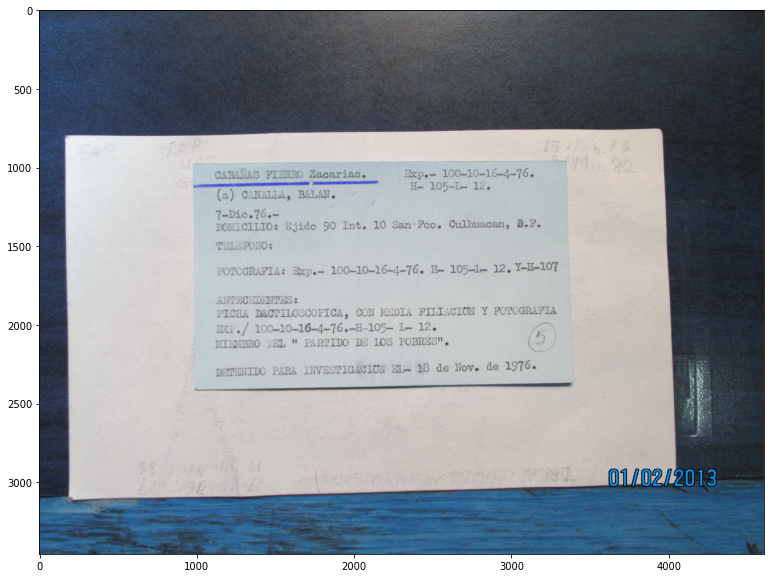

In [4]:
# Carga de imagen de prueba
sample = list(test_set.items())[0]
sample_path = os.path.join("Datos/", sample[1].get_ruta_archivo())

img = cv2.imread(os.path.join(sample_path))

plt.figure(figsize=(20,10))
plt.imshow(img)

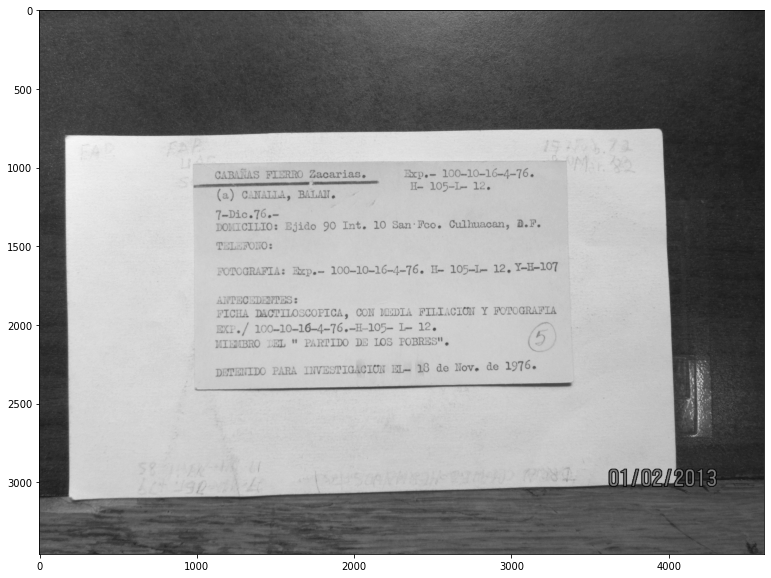

In [5]:
img = rgb_to_gray(img)

plt.figure(figsize=(20,10))
plt.imshow(img, cmap='gray')

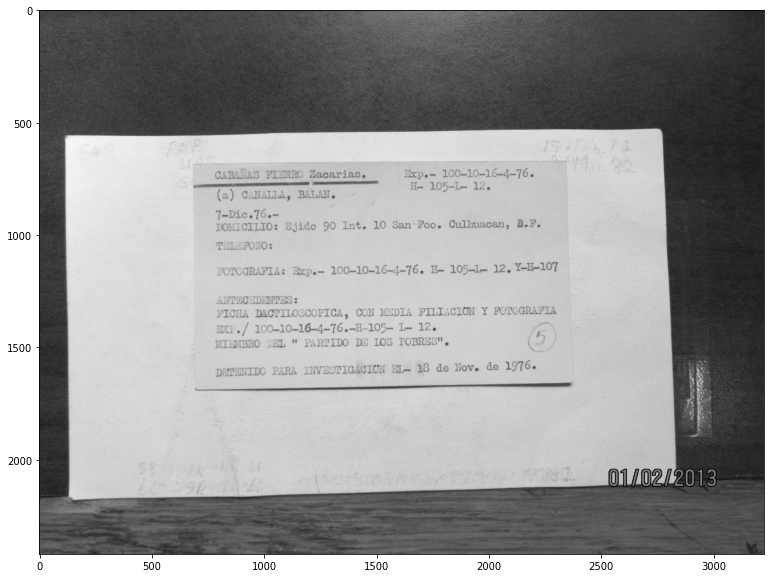

In [6]:
img = downscale_img(img, 0.7)
    
plt.figure(figsize=(20,10))
plt.imshow(img, cmap='gray')

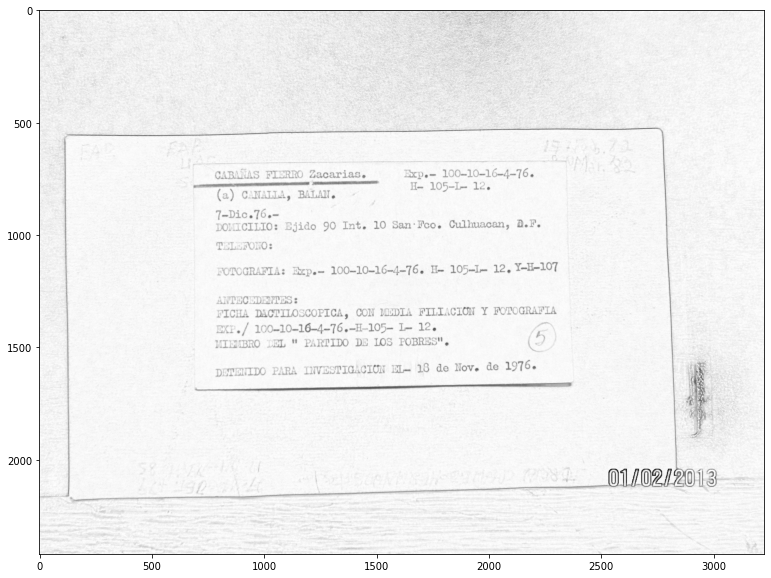

In [7]:
img = shadow_removal(img)

plt.figure(figsize=(20,10))
plt.imshow(img, cmap='gray')

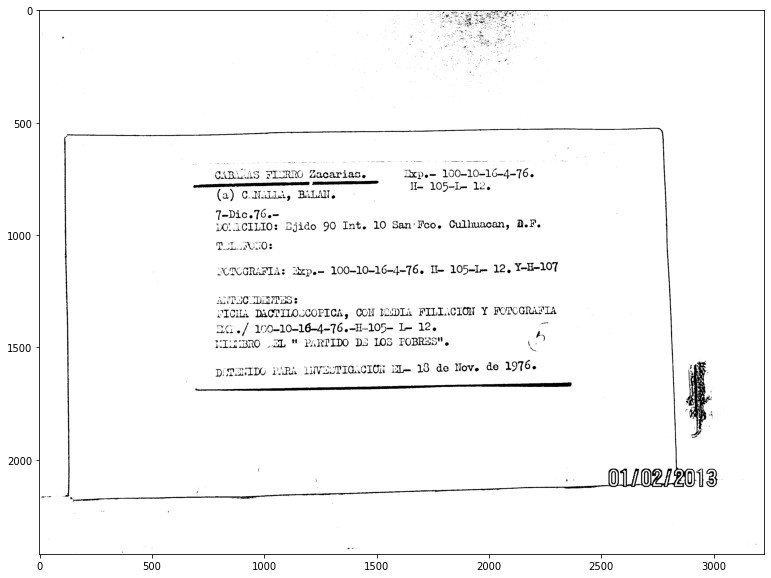

In [8]:
T, img_otsu = otsu_binarization(img)

img_otsu_inv = invert(img_otsu)

plt.figure(figsize=(20,10))
plt.imshow(img_otsu_inv, cmap='gray')

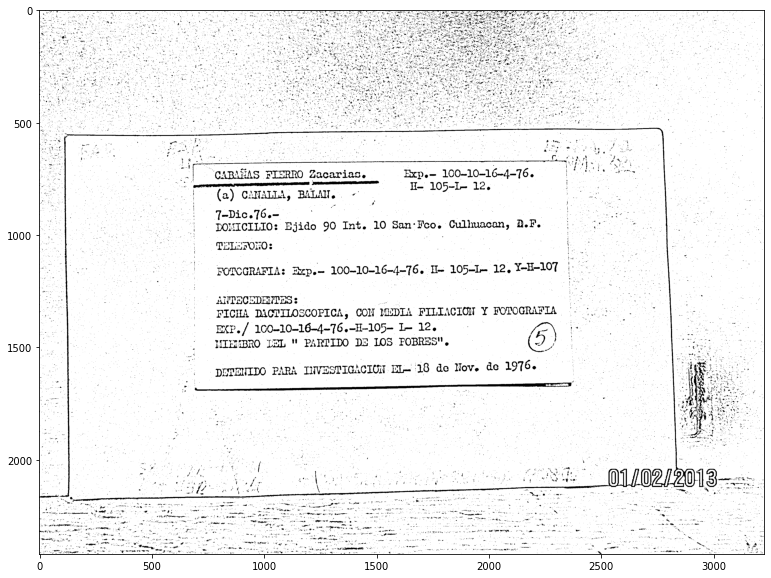

In [9]:
img_binaria = adaptive_binarization(img)

img_binaria_invt = invert(img_binaria)

plt.figure(figsize=(20,10))
plt.imshow(img_binaria_invt, cmap='gray')

In [10]:
# Corrección de orientación con Tesseract
"""
img_rotada_tess = deskew_tesseract(sample_path)

plt.figure(figsize=(20,10))
plt.imshow(img_rotada_tess, cmap='gray')
"""

"\nimg_rotada_tess = deskew_tesseract(sample_path)\n\nplt.figure(figsize=(20,10))\nplt.imshow(img_rotada_tess, cmap='gray')\n"

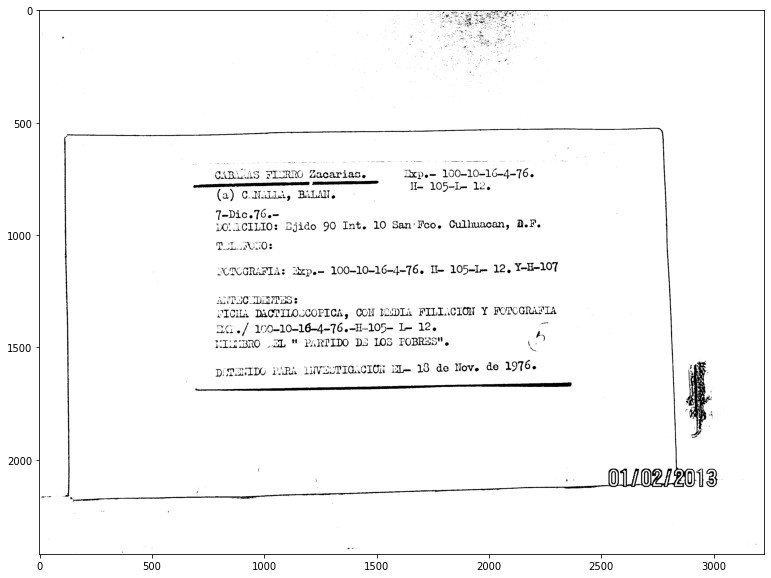

In [11]:
# Corrección de orientación con CV2
img_rotada_cv2 = deskew_cv2(img_otsu_inv)

plt.figure(figsize=(20,10))
plt.imshow(img_rotada_cv2, cmap='gray')

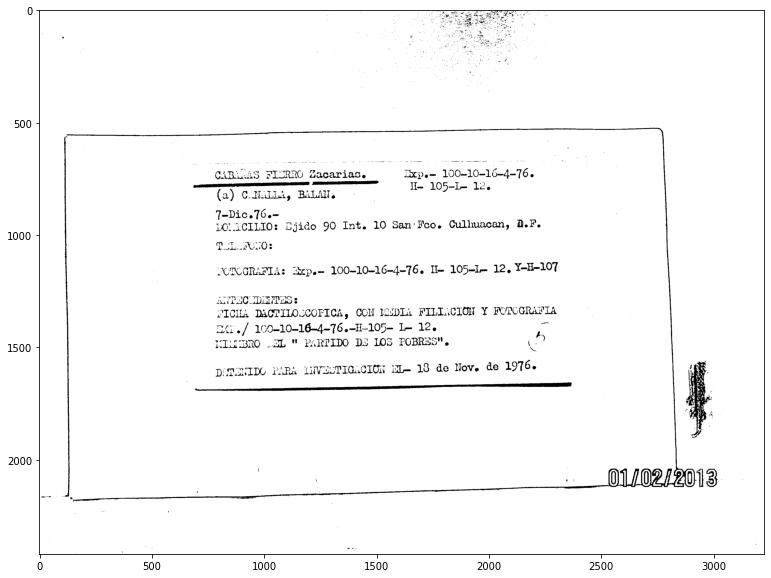

In [12]:
# Eliminación de los bordes
img_rotada_nb = remove_borders(img_rotada_cv2)

plt.figure(figsize=(20,10))
plt.imshow(img_rotada_nb, cmap='gray')

In [ ]:
# Eliminación de los bordes
final_img = crop_to_text(img_rotada_nb)

plt.figure(figsize=(20,10))
plt.imshow(final_img, cmap='gray')

### Evaluación de la eficacia del pre-procesamiento sobre el conjunto de pruebas

In [14]:
# Se copian los documentos de prueba a la carpeta Datos/Test
from shutil import copyfile

for i, Document in enumerate(test_set.items()):
    original_filepath = os.path.join("Datos/", Document[1].get_ruta_archivo())
    
    # Se carga la imagen original con cv2
    img = cv2.imread(os.path.join(original_filepath))
    
    # Se crea la estructura de carpetas
    if not os.path.exists("Datos/Test/"):
        os.mkdir("Datos/Test/")
    if not os.path.exists("Datos/Test/original/"):
        os.mkdir("Datos/Test/original/")
    if not os.path.exists("Datos/Test/procesados_adaptive/"):
        os.mkdir("Datos/Test/procesados_adaptive/")
    if not os.path.exists("Datos/Test/procesados_otsu/"):
        os.mkdir("Datos/Test/procesados_otsu/")
    
    new_filepath = os.path.join("Datos/Test/original/", Document[1].nombre_archivo)
    
    # Si el archivo no ha sido copiado
    if not os.path.isfile(new_filepath):
        copyfile(original_filepath, new_filepath)
    
    # Generando documento con binarización Otsu
    img_otsu = preprocess(img, binarization='otsu', orientation='cv2')
    otsu_filepath = os.path.join("Datos/Test/procesados_otsu", Document[1].nombre_archivo)
    cv2.imwrite(otsu_filepath, img_otsu)
    
    # Generando documento con binarización adaptativa
    img_adaptive = preprocess(img, binarization='adaptive', orientation='cv2')
    adaptive_filepath = os.path.join("Datos/Test/procesados_adaptive", Document[1].nombre_archivo)
    cv2.imwrite(adaptive_filepath, img_adaptive)
    
    print("Documento", i+1, "finalizado.")

Documento 1 finalizado.
Documento 2 finalizado.
Documento 3 finalizado.
Documento 4 finalizado.
Documento 5 finalizado.
Documento 6 finalizado.
Documento 7 finalizado.
Documento 8 finalizado.
Documento 9 finalizado.
Documento 10 finalizado.
Documento 11 finalizado.
Documento 12 finalizado.
Documento 13 finalizado.
Ángulo: 1.1134190559387207
Documento 14 finalizado.
Documento 15 finalizado.
Documento 16 finalizado.
Documento 17 finalizado.
Documento 18 finalizado.
Documento 19 finalizado.
Documento 20 finalizado.
Documento 21 finalizado.
Documento 22 finalizado.
Ángulo: 0.60111403465271
Ángulo: 0.601508378982544
Documento 23 finalizado.
Documento 24 finalizado.
Documento 25 finalizado.
Documento 26 finalizado.
Documento 27 finalizado.
Documento 28 finalizado.
Ángulo: 89.67991638183594
Documento 29 finalizado.
Documento 30 finalizado.
Documento 31 finalizado.
Documento 32 finalizado.
Documento 33 finalizado.
Documento 34 finalizado.
Documento 35 finalizado.
Documento 36 finalizado.
Docum

In [29]:
texto = """ADAME FLORE Samuél.- 
Exp-100-10-1-67.
COMUNISMO.
"H-156 L-24."
"R.I.P."
31.-May.-67.-El dia 28 actual en Atoyac de Alvarez
Gro. frente al Palacio Mpal. se efectuo Mitin d
los dirigentes del CONSEJO AUTODEFENSA DEL PUE
BLO DE ATOYAC, ASOC. DE CAFETICULTORES INDEPENDIE
TES DEL MPIO. DE ATOYAC y elementos del M.R.M.
con asistencia de 500 personas encabezadas por es
te elemento entre otros más.. Exp.100-10-1-69.
H- 202 L- 33.
20.Marzo.69. -GENARO VAZQUEZ ROJAS y su grupo se
estacionaron el 11 del actual en Piedra Ancha,
en el filo de la sierra, con éste elemento.-
Exp-100-10-16-2-71
H-370 L-2"""

def evaluate_text_languagetool(texto):
    import language_tool_python
    tool = language_tool_python.LanguageTool('es')
    
    matches = tool.check(texto)
    
    return matches
    
matches = evaluate_text_languagetool(texto)

28
3
ADAME FLORES Samuel.- 
ERP-100-10-1-67.
COMUNISMO.
"H-156 L-24."
"R.I.P."
31.-Más.-67.-El día 28 actual en Atolla de Álvarez
Gro. Frente al Palacio Mal. Se efectuó Mitin d
los dirigentes del CONSEJO AUTODEFENSA DEL QUE
LO DE APOYAR, ASÓ. DE CAFICULTORES INDEPENDICE
TÉS DEL MÍO. DE APOYAR y elementos del M.R.M.
con asistencia de 500 personas encabezadas por e
te elemento entre otros más. ERP.100-10-1-69.
H- 202 L- 33.
20. Marzo.69. -GENARO VÁZQUEZ ROJAS y su grupo se
estacionaron el 11 del actual en Piedra Ancha,
en el filo de la sierra, con este elemento.-
ERP-100-10-16-2-71
H-370 L-2
[Match({'ruleId': 'MORFOLOGIK_RULE_ES', 'message': 'Se ha encontrado un posible error ortográfico.', 'replacements': ['FLORES', 'FLOR', 'FLORA', 'FLOTE', 'FLOREA', 'LLORE', 'LLORÉ', 'AFLORE', 'FLOREO', 'FLOREÓ', 'FLOTÉ', 'FLORO', 'FLÓREZ', 'AFLORÉ', 'FLOREE', 'FLOREÁ', 'FLOREÉ', 'FLUORE', 'FLUORÉ'], 'offsetInContext': 6, 'context': 'ADAME FLORE Samuél.-  Exp-100-10-1-67. COMUNISMO. "...', 'offset': 6